In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import sys, os, glob
import glob
import wkbl
from wkbl.astro.halo_info import *
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
from matplotlib import rc
import datetime
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from astropy.cosmology import FlatLambdaCDM, LambdaCDM,z_at_value, Planck15
import astropy.units as u
cosmo =LambdaCDM(H0=69, Om0=0.286, Ode0=0.7)
msuntokg = 1.99844e30
kgtoGeVc2 = 1./1.782662e-27
kpctocm = 3.08567758e21
denstoGeVcm3 =  msuntokg * kgtoGeVc2 / kpctocm**3

# $\rho_{dm}$ evolution in time

In [3]:
# mochima
# 2 kpc thick shell
mochima_raw = np.loadtxt("../../datafiles/rho_vs_t_FILES/Mochima/dens_file.txt")
denen_rho_Mo = mochima_raw[:,0]* denstoGeVcm3
shell_rho_Mo = mochima_raw[:,1]* denstoGeVcm3
sigma_rho_Mo = mochima_raw[:,2]* denstoGeVcm3
z_Mo = mochima_raw[:,3]
t_Mo = cosmo.age(0).value-cosmo.age(z_Mo).value
# 1 kpc thick shell
mochima_raw = np.loadtxt("../../datafiles/rho_vs_t_FILES/Mochima1kpc/dens_file.txt")
denen_rho_Mo1kpc = mochima_raw[:,0]* denstoGeVcm3
shell_rho_Mo1kpc = mochima_raw[:,1]* denstoGeVcm3
sigma_rho_Mo1kpc = mochima_raw[:,2]* denstoGeVcm3
z_Mo1kpc = mochima_raw[:,3]
t_Mo1kpc = cosmo.age(0).value-cosmo.age(z_Mo1kpc).value
# Disc 
mochima_raw = np.loadtxt("../../datafiles/rho_vs_t_FILES/MochimaDisc/dens_file.txt")
denen_rho_MoDD = mochima_raw[:,0]* denstoGeVcm3
shell_rho_MoDD = mochima_raw[:,1]* denstoGeVcm3
sigma_rho_MoDD = mochima_raw[:,2]* denstoGeVcm3
z_MoDD = mochima_raw[:,3]
t_MoDD = cosmo.age(0).value-cosmo.age(z_MoDD).value
# Halo B
haloB_raw = np.loadtxt("../../datafiles/rho_vs_t_FILES/HALOB/dens_file.txt")
denen_rho_HB = haloB_raw[:,0]* denstoGeVcm3
shell_rho_HB = haloB_raw[:,1]* denstoGeVcm3
sigma_rho_HB = haloB_raw[:,2]* denstoGeVcm3
z_HB = haloB_raw[:,3]
t_HB = cosmo.age(0).value-cosmo.age(z_HB).value
# 1 kpc thick shell
haloB_raw = np.loadtxt("../../datafiles/rho_vs_t_FILES/HALOB1kpc/dens_file.txt")
denen_rho_HB1kpc = haloB_raw[:,0]* denstoGeVcm3
shell_rho_HB1kpc = haloB_raw[:,1]* denstoGeVcm3
sigma_rho_HB1kpc = haloB_raw[:,2]* denstoGeVcm3
z_HB1kpc = haloB_raw[:,3]
t_HB1kpc = cosmo.age(0).value-cosmo.age(z_HB1kpc).value
# Disc
haloB_raw = np.loadtxt("../../datafiles/rho_vs_t_FILES/HALOBDisc/dens_file.txt")
denen_rho_HBDD = haloB_raw[:,0]* denstoGeVcm3
shell_rho_HBDD = haloB_raw[:,1]* denstoGeVcm3
sigma_rho_HBDD = haloB_raw[:,2]* denstoGeVcm3
z_HBDD = haloB_raw[:,3]
t_HBDD = cosmo.age(0).value-cosmo.age(z_HBDD).value

In [4]:
z_HB

array([ 0.428,  0.25 ,  0.111, -0.   ])

<IPython.core.display.Javascript object>


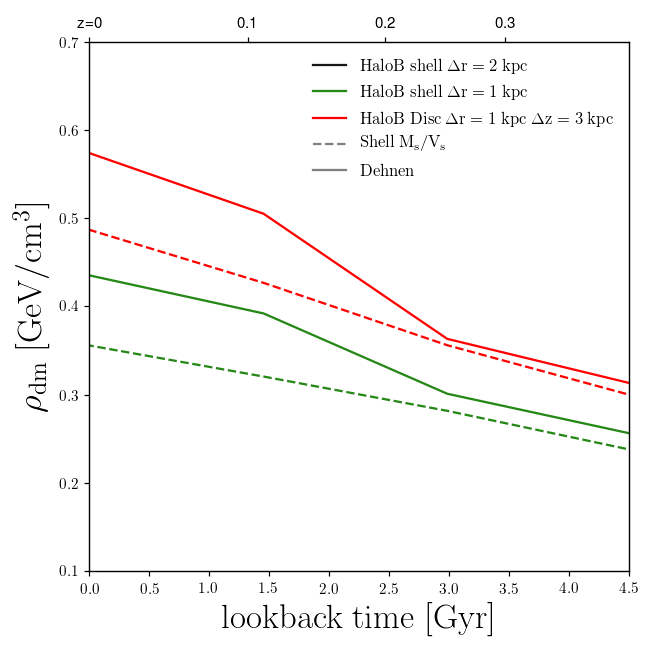

In [5]:
fig, ax = plt.subplots(figsize=[6,6])
fonto = 23
ax.set_xlabel(r"$\rm lookback\;time\;[Gyr]$",fontsize=fonto)
ax.set_ylabel(r"$\rm \rho_{dm}\;[GeV/cm^3]$",fontsize=fonto)
ax.set_xlim([0,4.5])
ax.set_ylim([0.1,0.7])



ax.plot(t_HB1kpc, denen_rho_HB1kpc ,c="#151716",
        label =r"$ \rm HaloB\;shell\; \Delta r = 2\;kpc $")
ax.plot(t_HB1kpc, shell_rho_HB1kpc ,c="#151716",ls="--")

#ax.fill_between(t_HB1kpc, denen_rho_HB1kpc- sigma_rho_HB1kpc,
#                denen_rho_HB1kpc + sigma_rho_HB1kpc,
#                color="#151716", alpha=0.5
#               )


ax.plot(t_HB, denen_rho_HB ,c="#258716",
        label = r"$ \rm HaloB\; shell\; \Delta r = 1\;kpc $")
ax.plot(t_HB, shell_rho_HB ,c="#258716",ls="--")

#ax.fill_between(t_HB, denen_rho_HB- sigma_rho_HB, denen_rho_HB + sigma_rho_HB,
#                color="#258716", alpha=0.5
#               )

ax.plot(t_HBDD, denen_rho_HBDD ,c="r",
        label = r"$ \rm HaloB\; Disc\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_HBDD, shell_rho_HBDD ,c="r",ls="--")

#ax.fill_between(t_HBDD, denen_rho_HBDD- sigma_rho_HBDD, denen_rho_HBDD + sigma_rho_HBDD,
#                color="r", alpha=0.5
#               )

ax.plot(100,100,c='gray', ls='--', label=r'$\rm Shell\; M_s/V_s$')
ax.plot(100,100,c='gray', ls='-', label=r'$\rm Dehnen$')


axu = ax.twiny()
axu.set_xlim(0,4.5)
ticksarra = np.array([cosmo.age(0.3).value,cosmo.age(0.2).value,cosmo.age(0.1).value,cosmo.age(0.0).value])
ticksarra = cosmo.age(0).value- ticksarra
axu.set_xticks(ticksarra)
axu.set_xticklabels(["0.3","0.2","0.1","z=0"])
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)


plt.tight_layout()
#plt.savefig("../../datafiles/rho_vs_t_FILES/rhovstime.png")

<IPython.core.display.Javascript object>


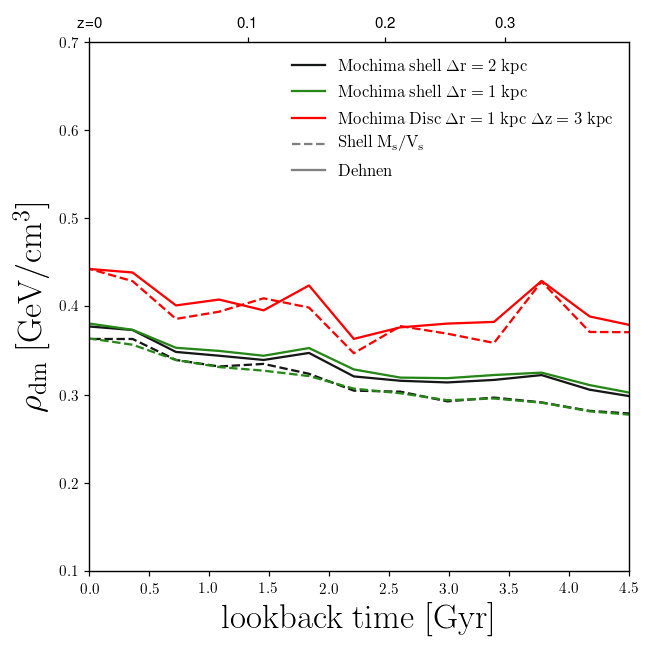

In [204]:
fig, ax = plt.subplots(figsize=[6,6])
fonto = 23
ax.set_xlabel(r"$\rm lookback\;time\;[Gyr]$",fontsize=fonto)
ax.set_ylabel(r"$\rm \rho_{dm}\;[GeV/cm^3]$",fontsize=fonto)
ax.set_xlim([0,4.5])
ax.set_ylim([0.1,0.7])


#ax.plot(t_HB, denen_rho_HB, c="#1c1687", label = "Halo B")
#ax.plot(t_HB, shell_rho_HB, c="#1c1687",ls="--")

#ax.fill_between(t_HB, denen_rho_HB - sigma_rho_HB, denen_rho_HB + sigma_rho_HB,
#                color="#1c1687", alpha=0.3
#               )



ax.plot(t_Mo1kpc, denen_rho_Mo1kpc ,c="#151716",
        label =r"$ \rm Mochima\;shell\; \Delta r = 2\;kpc $")
ax.plot(t_Mo1kpc, shell_rho_Mo1kpc ,c="#151716",ls="--")

#ax.fill_between(t_Mo1kpc, denen_rho_Mo1kpc- sigma_rho_Mo1kpc,
#                denen_rho_Mo1kpc + sigma_rho_Mo1kpc,
#                color="#151716", alpha=0.5
#               )


ax.plot(t_Mo, denen_rho_Mo ,c="#258716",
        label = r"$ \rm Mochima\; shell\; \Delta r = 1\;kpc $")
ax.plot(t_Mo, shell_rho_Mo ,c="#258716",ls="--")

#ax.fill_between(t_Mo, denen_rho_Mo- sigma_rho_Mo, denen_rho_Mo + sigma_rho_Mo,
#                color="#258716", alpha=0.5
#               )

ax.plot(t_MoDD, denen_rho_MoDD ,c="r",
        label = r"$ \rm Mochima\; Disc\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_MoDD, shell_rho_MoDD ,c="r",ls="--")

#ax.fill_between(t_MoDD, denen_rho_MoDD- sigma_rho_MoDD, denen_rho_MoDD + sigma_rho_MoDD,
#                color="r", alpha=0.5
#               )

ax.plot(100,100,c='gray', ls='--', label=r'$\rm Shell\; M_s/V_s$')
ax.plot(100,100,c='gray', ls='-', label=r'$\rm Dehnen$')


axu = ax.twiny()
axu.set_xlim(0,4.5)
ticksarra = np.array([cosmo.age(0.3).value,cosmo.age(0.2).value,cosmo.age(0.1).value,cosmo.age(0.0).value])
ticksarra = cosmo.age(0).value- ticksarra
axu.set_xticks(ticksarra)
axu.set_xticklabels(["0.3","0.2","0.1","z=0"])
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)


plt.tight_layout()
#plt.savefig("../../datafiles/rho_vs_t_FILES/rhovstime.png")

In [6]:
denen_rho_Mo1kpc[1,]

0.2985093823837571

# f(v)

In [7]:
colors = np.array(["#7fb3d5","#5499c7","#2980b9","#2471a3","#1f618d","#1f618d","#154360",
                   "#4a235a","#5b2c6f","#6c3483","#7d3c98","#8e44ad","#a569bd","#bb8fce"
                  ])

<IPython.core.display.Javascript object>


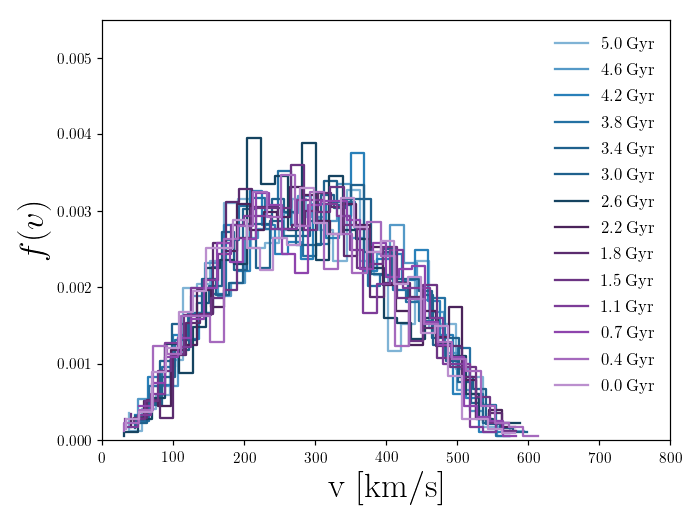

14


In [8]:
fdv_files = glob.glob("../../datafiles/rho_vs_t_FILES/MochimaDisc/fdv*")
fig, ax = plt.subplots()
ax.set_xlim([0,800])
ax.set_ylim([0,0.0055])

print len(fdv_files)
for j in range(len(fdv_files)):
    arr = np.loadtxt(fdv_files[j])
    ax.step(arr[:,0], arr[:,1], c=colors[j],label=r"$\rm {0:.1f} \;Gyr$".format(t_Mo[j]))
ax.set_xlabel(r"$\rm v\;[km/s]$",fontsize=fonto)
ax.set_ylabel(r"$ f(v)$",fontsize=fonto)
plt.tight_layout()
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)

<IPython.core.display.Javascript object>


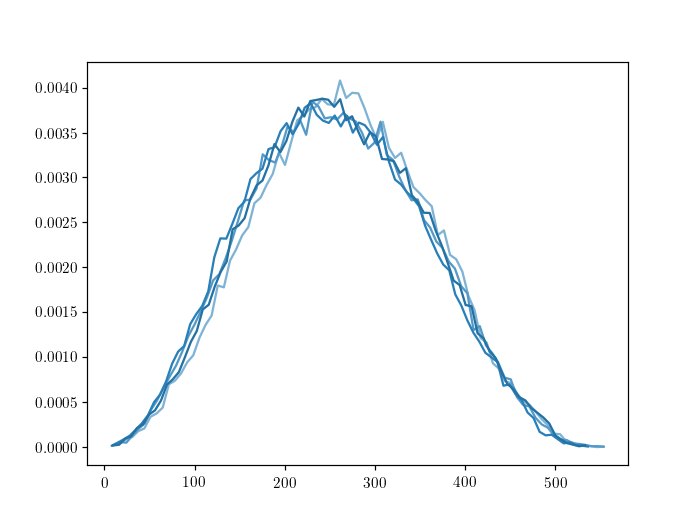

4


In [163]:
fdv_files = glob.glob("../../datafiles/rho_vs_t_FILES/HALOB/fdv*")
fig, ax = plt.subplots()
print len(fdv_files)
for i in range(len(fdv_files)):
    arr = np.loadtxt(fdv_files[i])
    ax.plot(arr[:,0], arr[:,1], c=colors[i])

In [9]:
colors = np.array(["#7fb3d5","#5499c7","#2980b9","#2471a3","#1f618d","#1f618d","#154360",
                   "#4a235a","#5b2c6f","#6c3483","#7d3c98","#8e44ad","#a569bd","#bb8fce"
                  ])

# Mochima

In [10]:
dens_mo = np.loadtxt("../../datafiles/rho_vs_t_FILES/Mochima1kpc/dens_file.txt")
t_mo = cosmo.age(0).value-cosmo.age(dens_mo[:,-1]).value


<IPython.core.display.Javascript object>


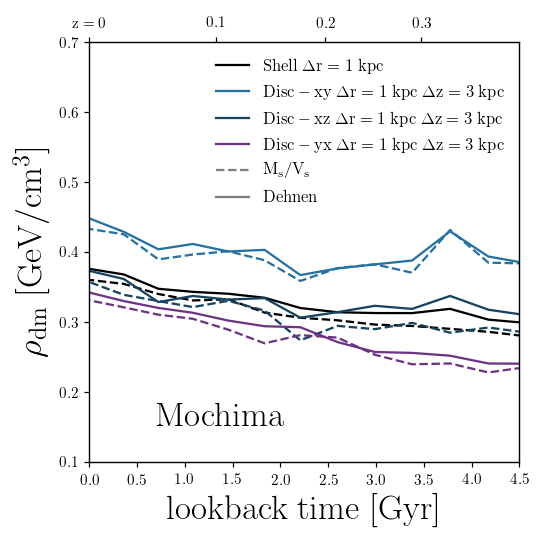

In [11]:
fig, ax = plt.subplots(figsize=[5,5])
fonto = 23
ax.set_xlabel(r"$\rm lookback\;time\;[Gyr]$",fontsize=fonto)
ax.set_ylabel(r"$\rm \rho_{dm}\;[GeV/cm^3]$",fontsize=fonto)
ax.set_xlim([0,4.5])
ax.set_ylim([0.1,0.7])
ax.plot(t_mo, dens_mo[:,0]* denstoGeVcm3,ls='-', c='k', label = r"$ \rm Shell\; \Delta r = 1\;kpc $")
ax.plot(t_mo, dens_mo[:,1]* denstoGeVcm3,ls='--', c='k')

ax.plot(t_mo, dens_mo[:,4]* denstoGeVcm3,ls='-', c=colors[3],label=r"$ \rm Disc-xy\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_mo, dens_mo[:,5]* denstoGeVcm3/3,ls='--', c=colors[3])

ax.plot(t_mo, dens_mo[:,8]* denstoGeVcm3,ls='-', c=colors[6],label=r"$ \rm Disc-xz\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_mo, dens_mo[:,9]* denstoGeVcm3/3,ls='--', c=colors[6])

ax.plot(t_mo, dens_mo[:,12]* denstoGeVcm3,ls='-', c=colors[9],label=r"$ \rm Disc-yx\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_mo, dens_mo[:,13]* denstoGeVcm3/3,ls='--', c=colors[9])


ax.plot(100,100,c='gray', ls='--', label=r'$\rm M_s/V_s$')
ax.plot(100,100,c='gray', ls='-', label=r'$\rm Dehnen$')

axu = ax.twiny()
axu.set_xlim(0,4.5)
ticksarra = np.array([cosmo.age(0.3).value,cosmo.age(0.2).value,cosmo.age(0.1).value,cosmo.age(0.0).value])
ticksarra = cosmo.age(0).value- ticksarra
axu.set_xticks(ticksarra)
axu.set_xticklabels([r"$0.3$",r"$0.2$",r"$0.1$",r"$\rm z=0$"])
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)
ax.text(0.7,0.15,r"$\rm Mochima$", fontsize=fonto)
fig.tight_layout()



<IPython.core.display.Javascript object>


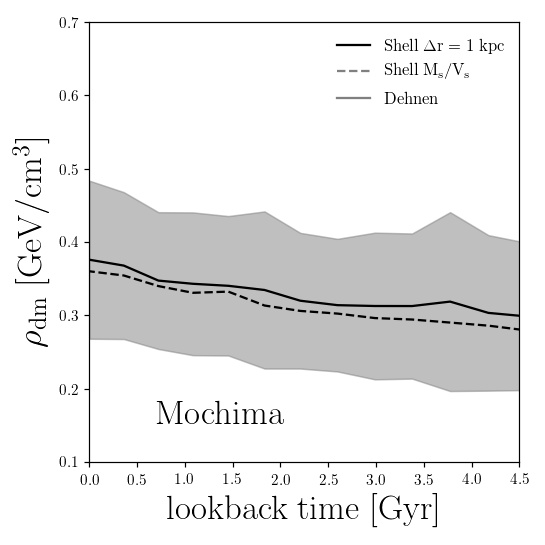

In [199]:
fig, ax = plt.subplots(figsize=[5,5])
fonto = 23
ax.set_xlabel(r"$\rm lookback\;time\;[Gyr]$",fontsize=fonto)
ax.set_ylabel(r"$\rm \rho_{dm}\;[GeV/cm^3]$",fontsize=fonto)
ax.set_xlim([0,4.5])
ax.set_ylim([0.1,0.7])
ax.plot(t_mo, dens_mo[:,0]* denstoGeVcm3,ls='-', c='k', label = r"$ \rm Shell\; \Delta r = 1\;kpc $")
ax.fill_between(t_mo, (dens_mo[:,0]+dens_mo[:,2])* denstoGeVcm3, (dens_mo[:,0]-dens_mo[:,2])* denstoGeVcm3,
                color='gray', alpha=0.5
               )

ax.plot(t_mo, dens_mo[:,1]* denstoGeVcm3,ls='--', c='k')

ax.plot(100,100,c='gray', ls='--', label=r'$\rm Shell\; M_s/V_s$')
ax.plot(100,100,c='gray', ls='-', label=r'$\rm Dehnen$')


axu.set_xlim(0,4.5)
ticksarra = np.array([cosmo.age(0.3).value,cosmo.age(0.2).value,cosmo.age(0.1).value,cosmo.age(0.0).value])
ticksarra = cosmo.age(0).value- ticksarra
axu.set_xticks(ticksarra)
axu.set_xticklabels([r"$0.3$",r"$0.2$",r"$0.1$",r"$\rm z=0$"])
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)
ax.text(0.7,0.15,r"$\rm Mochima$", fontsize=fonto)

fig.tight_layout()

In [12]:
dens_mo[:,0]* denstoGeVcm3

array([0.29492069, 0.29850938, 0.30331735, 0.31871078, 0.31264689,
       0.31271793, 0.31386094, 0.31991428, 0.33454674, 0.34025589,
       0.3429939 , 0.3473483 , 0.36779077, 0.37584061])

# HALO B

In [13]:
dens_mo = np.loadtxt("../../datafiles/rho_vs_t_FILES/HALOB1kpc/dens_file.txt")
t_mo = cosmo.age(0).value-cosmo.age(dens_mo[:,-1]).value

<IPython.core.display.Javascript object>


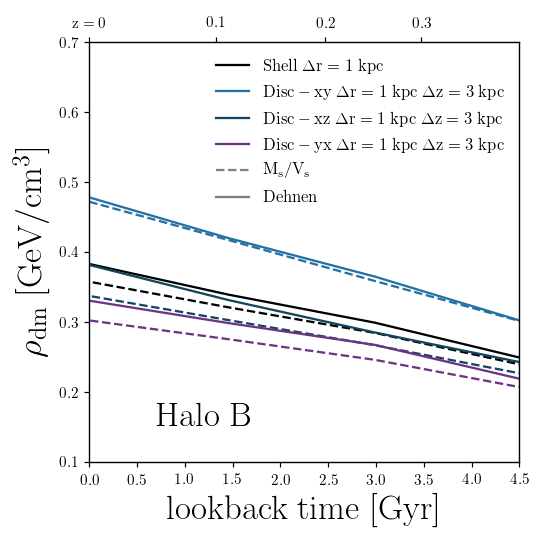

In [14]:
fig, ax = plt.subplots(figsize=[5,5])
fonto = 23
ax.set_xlabel(r"$\rm lookback\;time\;[Gyr]$",fontsize=fonto)
ax.set_ylabel(r"$\rm \rho_{dm}\;[GeV/cm^3]$",fontsize=fonto)
ax.set_xlim([0,4.5])
ax.set_ylim([0.1,0.7])
ax.plot(t_mo, dens_mo[:,0]* denstoGeVcm3,ls='-', c='k', label = r"$ \rm Shell\; \Delta r = 1\;kpc $")
ax.plot(t_mo, dens_mo[:,1]* denstoGeVcm3,ls='--', c='k')

ax.plot(t_mo, dens_mo[:,4]* denstoGeVcm3,ls='-', c=colors[3],label=r"$ \rm Disc-xy\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_mo, dens_mo[:,5]* denstoGeVcm3/3,ls='--', c=colors[3])

ax.plot(t_mo, dens_mo[:,8]* denstoGeVcm3,ls='-', c=colors[6],label=r"$ \rm Disc-xz\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_mo, dens_mo[:,9]* denstoGeVcm3/3,ls='--', c=colors[6])

ax.plot(t_mo, dens_mo[:,12]* denstoGeVcm3,ls='-', c=colors[9],label=r"$ \rm Disc-yx\; \Delta r = 1\;kpc\; \Delta z= 3\; kpc $")
ax.plot(t_mo, dens_mo[:,13]* denstoGeVcm3/3,ls='--', c=colors[9])


ax.plot(100,100,c='gray', ls='--', label=r'$\rm M_s/V_s$')
ax.plot(100,100,c='gray', ls='-', label=r'$\rm Dehnen$')

axu = ax.twiny()
axu.set_xlim(0,4.5)
ticksarra = np.array([cosmo.age(0.3).value,cosmo.age(0.2).value,cosmo.age(0.1).value,cosmo.age(0.0).value])
ticksarra = cosmo.age(0).value- ticksarra
axu.set_xticks(ticksarra)
axu.set_xticklabels([r"$0.3$",r"$0.2$",r"$0.1$",r"$\rm z=0$"])
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)
ax.text(0.7,0.15,r"$\rm Halo\;B$", fontsize=fonto)
fig.tight_layout()

<IPython.core.display.Javascript object>


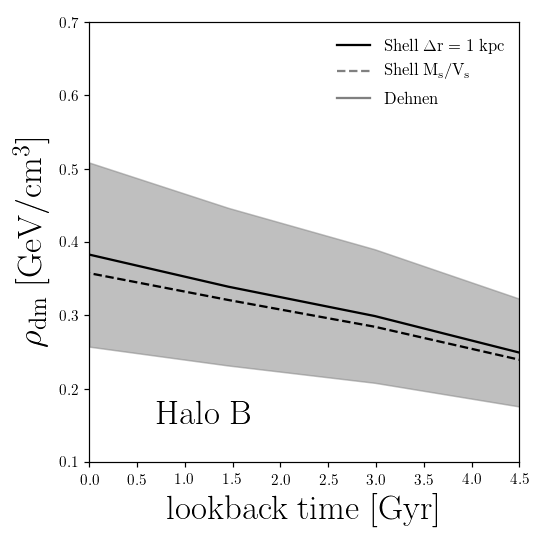

In [209]:
fig, ax = plt.subplots(figsize=[5,5])
fonto = 23
ax.set_xlabel(r"$\rm lookback\;time\;[Gyr]$",fontsize=fonto)
ax.set_ylabel(r"$\rm \rho_{dm}\;[GeV/cm^3]$",fontsize=fonto)
ax.set_xlim([0,4.5])
ax.set_ylim([0.1,0.7])
ax.plot(t_mo, dens_mo[:,0]* denstoGeVcm3,ls='-', c='k', label = r"$ \rm Shell\; \Delta r = 1\;kpc $")
ax.fill_between(t_mo, (dens_mo[:,0]+dens_mo[:,2])* denstoGeVcm3, (dens_mo[:,0]-dens_mo[:,2])* denstoGeVcm3,
                color='gray', alpha=0.5
               )

ax.plot(t_mo, dens_mo[:,1]* denstoGeVcm3,ls='--', c='k')

ax.plot(100,100,c='gray', ls='--', label=r'$\rm Shell\; M_s/V_s$')
ax.plot(100,100,c='gray', ls='-', label=r'$\rm Dehnen$')


axu.set_xlim(0,4.5)
ticksarra = np.array([cosmo.age(0.3).value,cosmo.age(0.2).value,cosmo.age(0.1).value,cosmo.age(0.0).value])
ticksarra = cosmo.age(0).value- ticksarra
axu.set_xticks(ticksarra)
axu.set_xticklabels([r"$0.3$",r"$0.2$",r"$0.1$",r"$\rm z=0$"])
leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)
ax.text(0.7,0.15,r"$\rm Halo\;B$", fontsize=fonto)

fig.tight_layout()

In [210]:
dens_mo[:,0]* denstoGeVcm3

array([0.24664077, 0.29900605, 0.33903171, 0.38279047])